<img src="img/viu_logo.png" width="200">

# 07MAIR - Redes Neuronales y Deep Learning
## Clase 02: Redes neuronales artificiales
<img src="img/keras_logo.jpg" width="200">

### Profesores: Adrián Colomer Granero / Gabriel Enrique Muñoz Ríos
### Autor: Carlos Fernández Musoles

### Sumario
- Funciones de activación
- Visualización con Tensorflow playground
- Ejemplo mnist keras
- Optimización

<img src="img/xor_multi_layer.png" width="300">

<img src="img/xor_multi_layer_solucion.png" width="300">

### Diferencias en batch size?
- Batch size 1
- tamaño del training set > Batch size > 1
- Batch size == tamaño del training set

- Batch size 1 
 - menos memoria, convergencia más lenta, época lenta

- Batch size == tamaño del training set
 - época es rápida, más memoria, más épocas

- tamaño del training set > Batch size > 1
 - balance entre las dos
 - valor exacto: ¿arte?

# Parámetros en el entrenamiento de ANNs

- Época (1 pase de todos los training samples)
- batch size (número de training samples considerados para hacer una modificación de los parámetros de la red)
- learning rate (magnitud del cambio en cada actualización)
- función de pérdida (error entre lo esperado y lo hallado)

- tradeoffs: 
 - batch size (alto lento en entrenar, mucha memoria, bajo poca memoria, erratico en bajar el error)
 - learning rate (alto problemas para alcanzar minimos globales, bajo lentitud y posible estancamiento en minimo local).
 
VIsualización de entrenamiento con TensorFlow playground https://playground.tensorflow.org

## Función de activación 

Muchas disponibles: https://en.wikipedia.org/wiki/Activation_function

#### Umbral
<img src="img/stepfunc.png" width="300">

Fuente: Wikipedia https://en.wikipedia.org/wiki/Step_function

- Input > umbral = 1, else 0

- Difícil convergencia durante entrenamiento
- Para multiclase, cómo decidir el output correcto (tres 1 y un 0)

#### Linear

<img src="img/linear.png" width="300">

Fuente: Wikipedia https://en.wikipedia.org/wiki/Activation_function 

- Input - output linear
- Output -inf a +inf

- Combinación de funciones lineales da una funcion lineal
- Explosión de valores (dificil entrenamiento)

#### Sigmoide

<img src="img/sigmoid.png" width="300">

- No linear
- Output 0 a 1

- Problema: entrenamiento puede ser lento cuando los valores residen en los extremos

#### Tangencial

<img src="img/tanh.png" width="300">

Fuente: Wolfram https://reference.wolfram.com/language/ref/Tanh.html

- No linear
- Output -1 a 1

- Gradiente más fuerte que sigmoide (derivadas son más intensas, por lo que la convergencia puede dificultarse)

#### ReLU (Rectified Linear Unit)

<img src="img/relu.png" width="300">

Fuente: Wikipedia https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

- No linear
- Output 0 a +inf

- Cualquier función puede aproximarse con una combinacion de ReLUs
- Aunque puede explotar (lado positivo) es más eficiente (menos calculos) que sigmoid o tanh
 - sigmoid / tanh requieren que todas las neuronas emitan un valor
 - calculo de la función de activacion es mas costoso
 - con ReLU, muchas serán 0 (sin calculo)

### La no linearidad de la funcion de activación es lo que permite a las ANNs aprender decision boundaries que no son lineales

### Variaciones de SGD
- rmsprop: dividir gradiente entre la media de las magnitudes recientes 
- momentum: la magnitud del cambio al actualizar parametros depende del gradiente actual y del cambio anterior. velocity = past_vel * momentum + learning_rate * gradient
- Otros disponibles en Keras https://keras.io/optimizers/

# Instalacion de Keras
- instalacion backend (GPU, CPU)
```python
pip install tensorflow
```
- Se puede utilizar la version GPU
 - Mas info https://www.tensorflow.org/install/gpu

- Instanacion de keras (pip)
```python
pip install keras
```

## Elemplo
Keras y el dataset MNIST para el reconocimiento de digitos escritos a mano

In [24]:
# cargar el dataset
from keras.datasets import mnist

# dividir en training y testing sets
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

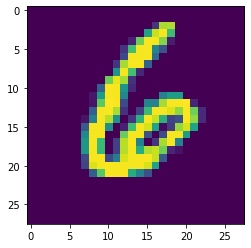

Label 6


In [25]:
# mostrar una imagen de prueba
import matplotlib.pyplot as plt
%matplotlib inline

ELEMENT=13
# NIUMERO MNIST Y SU ETIQUETA
plt.imshow(train_data[ELEMENT])
plt.show()
print('Label {}'.format(train_labels[ELEMENT]))

In [ ]:
28 x 28 pixeles

In [26]:
train_data.shape
# tres dimensiones
    # 0 == muestras 
    # 1 == x coord
    # 2 == y coord

(60000, 28, 28)

In [27]:
1 arquitectura de red
2 compilacion del modelo
3 entrenamiento

SyntaxError: invalid syntax (<ipython-input-27-d7f8c8a0ff4a>, line 1)

In [28]:
# definicion del modelo ANNç
# creacion de la red
from keras import models
from keras import layers

# metodo secuencial
# permite instanciar obj secuencoal de la calse modelo
#  luego se meten capas a ese modelo
network = models.Sequential()
# queremos capas conectadas en feedforward (todas las unidades de una capa a todas las unidades de la siguiente)
# 1ra hiden layer , 512 neuronas()
# en input de la red hay tantas segun pixeles 28X28, esta se reduce a 512, debe ser potencia de 2 para optimizar trabajo de gpu, se redimensiona, usando esta capa
# la funcion de activacion es relu
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
# capa de salida, con 10 neuronas, 10 clases de salida, del 0 al 9
# la FA es una softmax es usada para capa salida, en problemas de clasificaicon multiclase
# lo que hace repartir un punto de prob entre las dif clases que se tiene, la suma de todas las clases seria 1, entre 10 clases
network.add(layers.Dense(10,activation='softmax'))
# son capas densas, capas con neuronas en forma vertical, ordenadas vert

# luego de compila sse crea la network, arquitectura de red instanciada en network

In [29]:
# compilar el modelo
# elegimos funcion de perdida, algoritmo de descenso de gradienteç
# añade los hiperparametros en los q se hace el entrenamiento
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
# categorical_crossentropy funcion deperdicio, calcula el error entre lo predecido y lo real
# categorical_crossentropy convierte etiquetas decimales  a nojenccoding
# nojenccoding string binario, defina una pos en 1 y lo sdemas 0
# sparse_categorical_crossentropy

Transformar los datos , para entrenamiento mas rapido
- eliminar una dimension, a la red no entra 2 dimensiones, perceptron multicapa solo se usa en 1 dimension
- cambiar rango de 0-255 a 0-1, que los pixeles se muevan de 0 a 1 en vez de 0 a 255
- labels categoricas

In [30]:
# Transformacion de los datos
# redimensionamos a 1D cada imagen
train_data = train_data.reshape((60000,28*28)) # 600000 instancias a un array de 28 x 28
test_data = test_data.reshape((10000,28*28)) # 10000 instancias a un array de 28 x 28

In [31]:
# normalizamos los datos (de 0 a 1)
train_data = train_data.astype('float32')/255 # normaliza entre 0 a 1
test_data = test_data.astype('float32')/255

In [32]:
print(train_labels[4])
# en el primer elemento tengo un 5
# en el 2 elemento tengo un 0

9


In [33]:
# categorizamos las labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [34]:
# entrenamos el modelo
# eleccion de parametros
#   epocas
#   batch size
# en lotes de 128 pasos, 60000/128 = 468 actualizaciones d elos w, durante 5 epocas, para completar una epoca
# 600000 conj de entrenamiento

network.fit(train_data,train_labels,epochs=5,batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.2537 - accuracy: 0.9269
Epoch 2/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.1039 - accuracy: 0.9689
Epoch 3/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.0693 - accuracy: 0.9788
Epoch 4/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.0507 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.0382 - accuracy: 0.9885


In [ ]:
al modelo le costo entrena la suma de los tiempos arriba 2 + 1 +1  ...

Evaluar el modelo con el set de test, el data set de test

In [35]:
loss, accuracy = network.evaluate(test_data,test_labels)
print('Loss {}, accuracy {}'.format(loss,accuracy))

10000/10000 [==============================] - 0s 22us/step
Loss 0.0674302632224746, accuracy 0.9785000085830688


In [ ]:
97.85% d eprecision

In [37]:
import numpy as np
#predicciones
SAMPLE = 100 # muestra 1000, diferentes muestras para comparar con el predicho y el real
# reshape para traer de nuevo el 764  original
sample = test_data[SAMPLE,:].reshape((1,28*28))
y_value = np.array(test_labels[SAMPLE]).reshape((1,10))
predictions = network.predict(sample)
print(predictions)
print('Total sum is {}, classified as {}, real value {}'.format(sum(predictions),np.argmax(predictions),np.argmax(y_value)))

[[3.1558029e-05 1.0402198e-07 1.7586110e-05 7.1512694e-08 2.9016610e-07
  6.5060603e-06 9.9993825e-01 7.9345193e-07 4.7541103e-06 4.4440270e-08]]
Total sum is [3.1558029e-05 1.0402198e-07 1.7586110e-05 7.1512694e-08 2.9016610e-07
 6.5060603e-06 9.9993825e-01 7.9345193e-07 4.7541103e-06 4.4440270e-08], classified as 6, real value 6


## classified as 9, real value 9
## classified as 6, real value 6
## es la probilidad de que el numero pertenezc a cada clase, era del 0 a 9, 
 9993825e-01 era la mas probable asociada al numero 6 en orden
[3.1558029e-05 1.0402198e-07 1.7586110e-05 7.1512694e-08 2.9016610e-07
 6.5060603e-06 9.9993825e-01 7.9345193e-07 4.7541103e-06 4.4440270e-08]

## Ejemplo REUTERS
Incluye como representar el proceso de aprendizaje

In [38]:
from keras.datasets import reuters

WORD_LIMIT = 10000
(training_data, training_labels), (testing_data, testing_labels) = reuters.load_data(num_words=WORD_LIMIT)

2113536/2110848 [==============================] - 4s 2us/step


In [39]:
# los datos son numericos
# para decodificarlos, se puede usar reuters.get_word_index()

word_index = reuters.get_word_index()
reverse_word_index = dict({value : key for key, value in word_index.items()})
decoded = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in training_data[1]]
)
decoded

557056/550378 [==============================] - 1s 2us/step


'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [40]:
# arriba, se hace un mapeo de palabras para la red

In [41]:
from keras import layers
from keras import models

model = models.Sequential()
# activacion relu
# 64 es solo un ejemplo , otro podria ocmportarse mejor, 128 etc
model.add(layers.Dense(64,activation='relu',input_shape=(WORD_LIMIT,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='sigmoid')) # output entre 0 y 1, probabilidad

Hot encoding palabras
<img src="img/hot_encoding.png" width="300">

In [42]:
ya no son imagenes son palabras

SyntaxError: invalid syntax (<ipython-input-42-e9f9e6d7a053>, line 1)

In [43]:
import numpy as np

# one hot encoding del input, vector con cada indice indicando si una palabra esta presente
# pasa cadenas de palabra a cadena de binarios
def one_hot_encode(data):
    encoded = np.zeros((len(data),WORD_LIMIT))
    for i, v in enumerate(data):
        encoded[i,v] = 1 # localiza las columnas del genero correspondiente, marca con 1
    return encoded

In [44]:
training_set = one_hot_encode(training_data)
testing_set = one_hot_encode(testing_data)

In [45]:
from keras.utils import to_categorical

y_train = to_categorical(training_labels)
y_test = to_categorical(testing_labels)


In [46]:
print(y_train.shape)
print(y_test.shape)

(8982, 46)
(2246, 46)


In [47]:
print(training_set.shape)
print(testing_set.shape)
# 100000 palabras
# se convierte a binario para q la red entienda, soolo entiende numeros
# cada palabra es un vector de 10000

(8982, 10000)
(2246, 10000)


In [48]:
model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [49]:
#obtener historial del entrenamiento para estadisticas
# cuanto mas complejo probar mas epocas, 
# validation_split guardar o divide un 20% de las muestra de training para validacion (no test)
# se usa para validar si hay overfitting
history = model.fit(training_set,y_train,epochs=20,batch_size=512,
                   validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 1s 102us/step - loss: 3.4040 - accuracy: 0.4782 - val_loss: 2.9486 - val_accuracy: 0.5192
Epoch 2/20
7185/7185 [==============================] - 0s 61us/step - loss: 2.5316 - accuracy: 0.4074 - val_loss: 2.2190 - val_accuracy: 0.3450
Epoch 3/20
7185/7185 [==============================] - 0s 62us/step - loss: 1.8480 - accuracy: 0.3534 - val_loss: 1.7570 - val_accuracy: 0.3450
Epoch 4/20
7185/7185 [==============================] - 0s 65us/step - loss: 1.4401 - accuracy: 0.3534 - val_loss: 1.5640 - val_accuracy: 0.3489
Epoch 5/20
7185/7185 [==============================] - 1s 77us/step - loss: 1.1328 - accuracy: 0.5410 - val_loss: 1.1491 - val_accuracy: 0.7518
Epoch 6/20
7185/7185 [==============================] - 1s 76us/step - loss: 0.7146 - accuracy: 0.8579 - val_loss: 1.1463 - val_accuracy: 0.7474
Epoch 7/20
7185/7185 [==============================] - 0s 66us/step - loss: 0.55

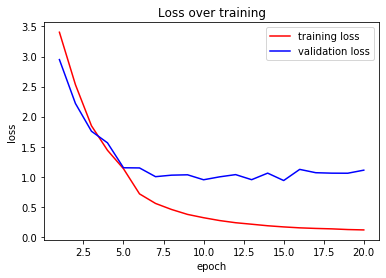

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot loss
epochs = np.arange(1,len(history.history['loss'])+1)
plt.title('Loss over training')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs,history.history['loss'],'r',label='training loss')
plt.plot(epochs,history.history['val_loss'],'b',label='validation loss')
plt.legend(loc='best')
plt.show()
# linea azul es computacion del error, no sigue al rojo, puede haber signo de overfitting
# no tienen la misma precision
# overfiting, la perdida en validacion aumento conforme las epocas

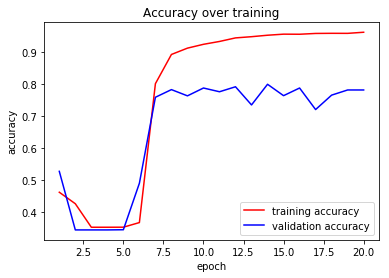

In [14]:
#plot accuracy
epochs = np.arange(1,len(history.history['acc'])+1)
plt.title('Accuracy over training')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epochs,history.history['acc'],'r',label='training accuracy')
plt.plot(epochs,history.history['val_acc'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

# precision llega en validacion al casi 80%

In [51]:
model.predict(testing_set)
loss, accuracy = model.evaluate(testing_set,y_test)

2246/2246 [==============================] - 0s 42us/step


crear subconjuntos en los test de training para validar, no usar el de test

In [16]:
print('Loss {}, accuracy {}'.format(loss,accuracy))

Loss 1.1145100969346846, accuracy 0.778717720444884


### Ejercicio
Comparar los resultados con otros modelos
- alterar la arquitectura de la red (numero de neuronas, numero de layers)
- Mostrar que con menos hidden units se pierde info que no se puede recuperar
- 'tanh' en vez de 'relu'
- distinto split training / validation (mayoria validation)

# Optimizacion de redes neuronales
- Preprocesado para ANN: 
 - vectorizacion del input (tensores)
 - normalizacion de valores para acelerar entrenamiento (todas las features deben tener misma escala), media 0 std 1
 - Valores missing: eliminar, utilizar 0 (si 0 no tiene significado)

- Feature engineering (menos importante en deep learning)
 - Feature cross
 - creacion de features basadas en el dominio

- Weight regularization
- Dropout

### Weight regularisation

- El modelo mas sencillo (menos parametros) que explique los datos es preferido
- Evitar overfitting
- Hace que los parametros tengan valores muy pequeños (coste a cada solución dependiente de la magnitud de los parametros)
 - coste proporcional al valor absoluto (L1) o proporcional a la raiz cuadrada del valor
- trabajar w  mas pequeños
- normalizacion L1 cuando se divide el w con el val abs, o L2 si se dividide con laraiz

In [53]:
from keras.datasets import mnist
from keras import models
from keras import layers

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data = train_data.reshape((60000,28*28))
train_data = train_data.astype('float32')/255
test_data = test_data.reshape((10000,28*28))
test_data = test_data.astype('float32')/255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [54]:
#modelo sin regularizacion
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
# otra hiden layer, mas grados de libertad, habras mas w y bias
network.add(layers.Dense(256,activation='relu'))
network.add(layers.Dense(10,activation='softmax'))

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
# sobreentrenamiento con 30 epocas
# el val de loss primero baja luego sube, indice de soverfitting
# normalizaCION L1
history_network = network.fit(train_data,train_labels,epochs=30,batch_size=128,validation_split=0.8)

Train on 11999 samples, validate on 48001 samples
Epoch 1/30
11999/11999 [==============================] - 1s 84us/step - loss: 0.4574 - accuracy: 0.8624 - val_loss: 0.2880 - val_accuracy: 0.9110
Epoch 2/30
11999/11999 [==============================] - 1s 70us/step - loss: 0.1850 - accuracy: 0.9445 - val_loss: 0.1947 - val_accuracy: 0.9410
Epoch 3/30
11999/11999 [==============================] - 1s 68us/step - loss: 0.1163 - accuracy: 0.9642 - val_loss: 0.1953 - val_accuracy: 0.9383
Epoch 4/30
11999/11999 [==============================] - 1s 69us/step - loss: 0.0762 - accuracy: 0.9773 - val_loss: 0.1715 - val_accuracy: 0.9497
Epoch 5/30
11999/11999 [==============================] - 1s 79us/step - loss: 0.0507 - accuracy: 0.9836 - val_loss: 0.1741 - val_accuracy: 0.9522
Epoch 6/30
11999/11999 [==============================] - 1s 67us/step - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.1539 - val_accuracy: 0.9590
Epoch 7/30
11999/11999 [==============================] - 1s 67us/st

In [55]:
#modelo con regularizacion L2
from keras import regularizers

network_l2reg = models.Sequential()
#REGULARIZACION DIVIDE LOS PESOS POR 0.0001
# EN CADA BACKPROPAGATION YA LLEG AACTUALIZADO EL W
network_l2reg.add(layers.Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(28*28,)))
network_l2reg.add(layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
network_l2reg.add(layers.Dense(10,activation='softmax'))

network_l2reg.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history_network_l2reg = network_l2reg.fit(train_data,train_labels,epochs=30,batch_size=128,validation_split=0.8)

Train on 11999 samples, validate on 48001 samples
Epoch 1/30
11999/11999 [==============================] - 1s 85us/step - loss: 1.1035 - accuracy: 0.8519 - val_loss: 0.7720 - val_accuracy: 0.9170
Epoch 2/30
11999/11999 [==============================] - 1s 88us/step - loss: 0.6363 - accuracy: 0.9373 - val_loss: 0.5647 - val_accuracy: 0.9391
Epoch 3/30
11999/11999 [==============================] - 1s 80us/step - loss: 0.4759 - accuracy: 0.9532 - val_loss: 0.6154 - val_accuracy: 0.8893
Epoch 4/30
11999/11999 [==============================] - 1s 85us/step - loss: 0.3837 - accuracy: 0.9595 - val_loss: 0.3899 - val_accuracy: 0.9492
Epoch 5/30
11999/11999 [==============================] - 1s 82us/step - loss: 0.3174 - accuracy: 0.9669 - val_loss: 0.3648 - val_accuracy: 0.9478
Epoch 6/30
11999/11999 [==============================] - 1s 79us/step - loss: 0.2764 - accuracy: 0.9692 - val_loss: 0.3818 - val_accuracy: 0.9323
Epoch 7/30
11999/11999 [==============================] - 1s 70us/st

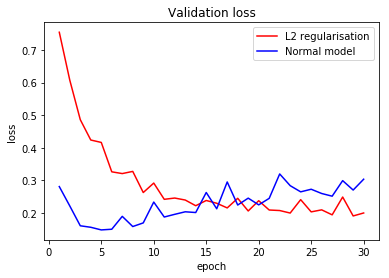

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot loss
epochs = np.arange(1,len(history_network_l2reg.history['loss'])+1)
plt.title('Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs,history_network_l2reg.history['val_loss'],'r',label='L2 regularisation')
plt.plot(epochs,history_network.history['val_loss'],'b',label='Normal model')
plt.legend(loc='best')
plt.show()

### Dropout

- Aleatoriamente poner 0 en output features de una capa
- Dropout rate determina la proporcion de 0s
- Funciona al eliminar patrones espurios (evita overfitting)
- desconectar neuronas ne el entrenamientos
- situar Ws en 0
- Solo se hace en la fase dentrenamiento


In [56]:
#modelo con regularizacion por dropout
network_dropout = models.Sequential()
network_dropout.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
# 50% de 512 neuronas se hacen 0
network_dropout.add(layers.Dropout(0.5)) # desconecta neuronas, w a 0, de forma aleatoria, para disminuir grados de libertad, o disminuir muestras
network_dropout.add(layers.Dense(256,activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(10,activation='softmax'))

# si el overfiting datos no mejora, entonces se tiene q reducir la profundidad, a menos q no se tenga mas data

network_dropout.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history_network_dropout = network_dropout.fit(train_data,train_labels,epochs=30,batch_size=128,validation_split=0.8)

Train on 11999 samples, validate on 48001 samples
Epoch 1/30
11999/11999 [==============================] - 1s 86us/step - loss: 0.6968 - accuracy: 0.7836 - val_loss: 0.3025 - val_accuracy: 0.9095
Epoch 2/30
11999/11999 [==============================] - 1s 74us/step - loss: 0.3249 - accuracy: 0.9029 - val_loss: 0.2474 - val_accuracy: 0.9260
Epoch 3/30
11999/11999 [==============================] - 1s 74us/step - loss: 0.2442 - accuracy: 0.9275 - val_loss: 0.2076 - val_accuracy: 0.9386
Epoch 4/30
11999/11999 [==============================] - 1s 75us/step - loss: 0.1964 - accuracy: 0.9416 - val_loss: 0.1758 - val_accuracy: 0.9471
Epoch 5/30
11999/11999 [==============================] - 1s 74us/step - loss: 0.1688 - accuracy: 0.9517 - val_loss: 0.1709 - val_accuracy: 0.9499
Epoch 6/30
11999/11999 [==============================] - 1s 75us/step - loss: 0.1390 - accuracy: 0.9579 - val_loss: 0.1673 - val_accuracy: 0.9516
Epoch 7/30
11999/11999 [==============================] - 1s 75us/st

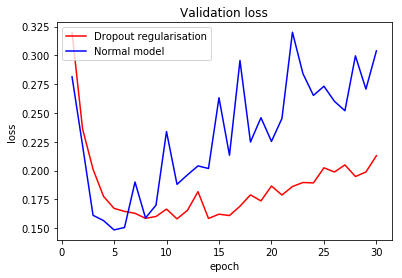

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot loss
epochs = np.arange(1,len(history_network_l2reg.history['loss'])+1)
plt.title('Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs,history_network_dropout.history['val_loss'],'r',label='Dropout regularisation')
plt.plot(epochs,history_network.history['val_loss'],'b',label='Normal model')
plt.legend(loc='best')
plt.show()

# aun posee overfitting, pero mas ligero
# jugar con el dropout para normalizar la grafica

## Función de pérdida / función de activación

- Dependiente del problema
 - clasificación binaria: activación ultima capa (sigmoide), función de perdida (binary_crossentropy)
 - clasificacion multiclase: activación ultima capa (softmax), función de perdida (categorical_crossentropy)
 - regresión con valores arbitrarios: activación ultima capa (none), función de perdida (mse)
   - una funcion de salida util seria una none osea una lineal, pues lo mismo enel input tienes en el output
 - regresión valores 0 a 1: activación ultima capa (sigmoide), función de perdida (mse o binary_crossentropy)
   - funcion de PERDIDA SON MAE o MSE
 
 Info en Keras https://keras.io/losses/